In [2]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [3]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)
matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [5]:

# 인구현황.csv 로드하여 DataFrame 객체생성 , 변수명은 df_all
df_all = pd.read_csv('../data/인구현황.csv')
df_all.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [6]:
# 전국 데이터는 제거하고 새로운 DataFrame 생성, 변수명은 df
df = df_all.loc[df_all['행정기관'] != '전국'].copy()
df.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97


In [7]:
print("\n결측치 확인:")
print(df.isnull().sum())


결측치 확인:
행정기관코드    0
행정기관      0
총인구수      0
세대수       0
세대당 인구    0
남자 인구수    0
여자 인구수    0
남여 비율     0
dtype: int64


1. 지역별 총인구수 TOP5

In [10]:
df[['행정기관','총인구수']].sort_values(by='총인구수', ascending=False).head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


1-1. 지역별 총인구수 plot

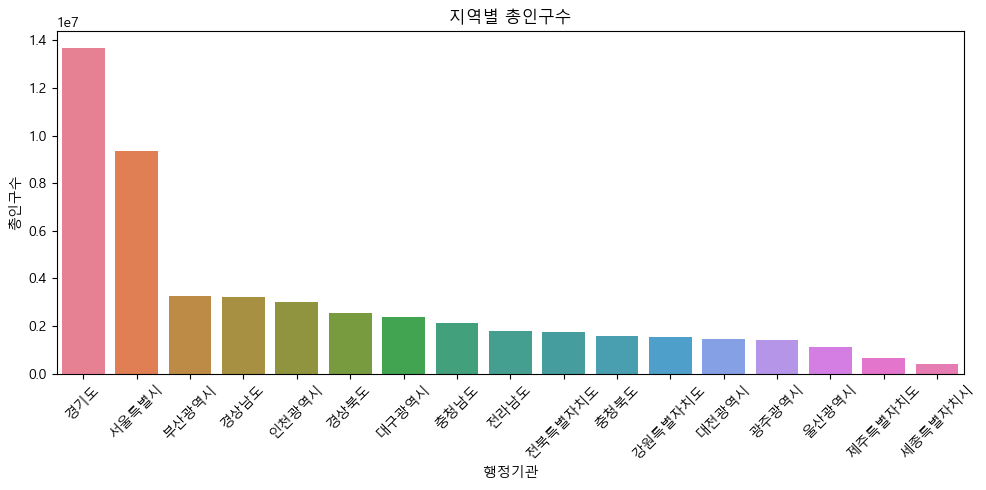

In [ ]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(data=df.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수', hue='행정기관')

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.show()

2. 세대당 인구수 높은 지역 Top 5

In [24]:
df[['행정기관','세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True).head()

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


2-1. 지역별 세대당 인구 Plot

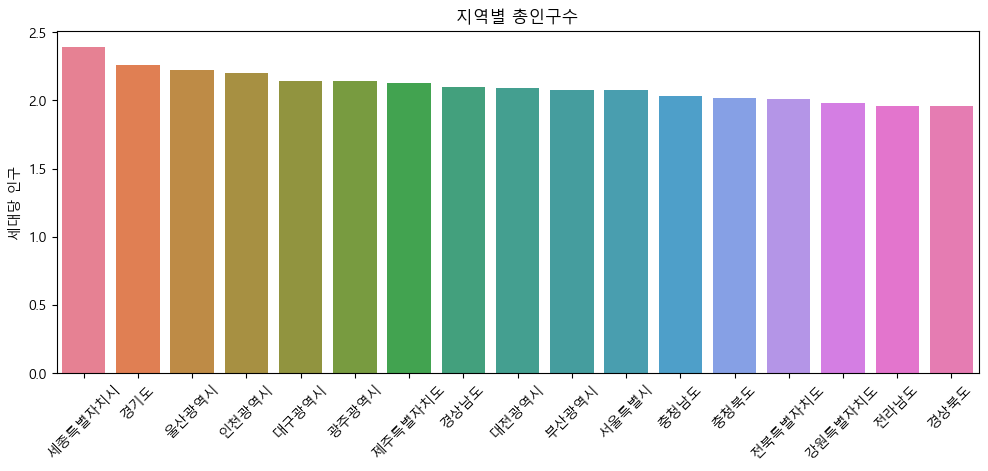

In [36]:
plt.figure(figsize=(10,5))
# seaborn의 barplot() 함수사용
sns.barplot(data=df.sort_values(by='세대당 인구', ascending=False), x='행정기관',y='세대당 인구', hue='행정기관')

plt.xticks(rotation=45)
plt.title('지역별 총인구수')
plt.tight_layout()
plt.xlabel('')
plt.show()

3. 남녀 비율 분석

In [23]:
df[['행정기관', '남여 비율']].sort_values(by='남여 비율',ascending=False).reset_index(drop=True)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


3-1. 남녀 비율 분석 Plot

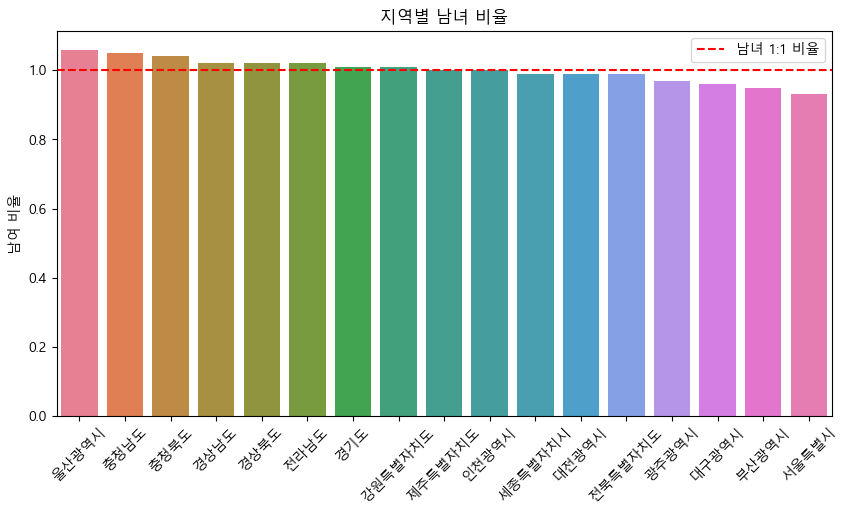

In [94]:

plt.figure(figsize=(10,5))

sns.barplot(data=df.sort_values(by='남여 비율', ascending=False), x ='행정기관', y = '남여 비율', hue='행정기관')
plt.title('지역별 남녀 비율')
plt.axhline(y = 1.0, color='r', linestyle='--', label='남녀 1:1 비율')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.xlabel('')
plt.show()

4. 남자초과 / 여자초과 분석

In [46]:
temp_df = df[['행정기관','남여 비율']].copy()
def categori(x):
    if x > 1:
        return '남초'
    elif x == 1:
        return '동일'
    else:
        return '여초'
temp_df['남초여초'] = temp_df['남여 비율'].map(categori)
temp_df

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


5. 세대당 인구 평균보다 높은 지역

In [52]:
print("5. 세대당 인구 평균보다 높은 지역")
print(f'전국 평균 세대당 인구수: {df['세대당 인구'].mean():.2f}')
df.loc[df['세대당 인구'] > df['세대당 인구'].mean(),['행정기관','세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

5. 세대당 인구 평균보다 높은 지역
전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


5-1. 남초 vs 여초 개수 Plot / 지역별 세대수 Plot

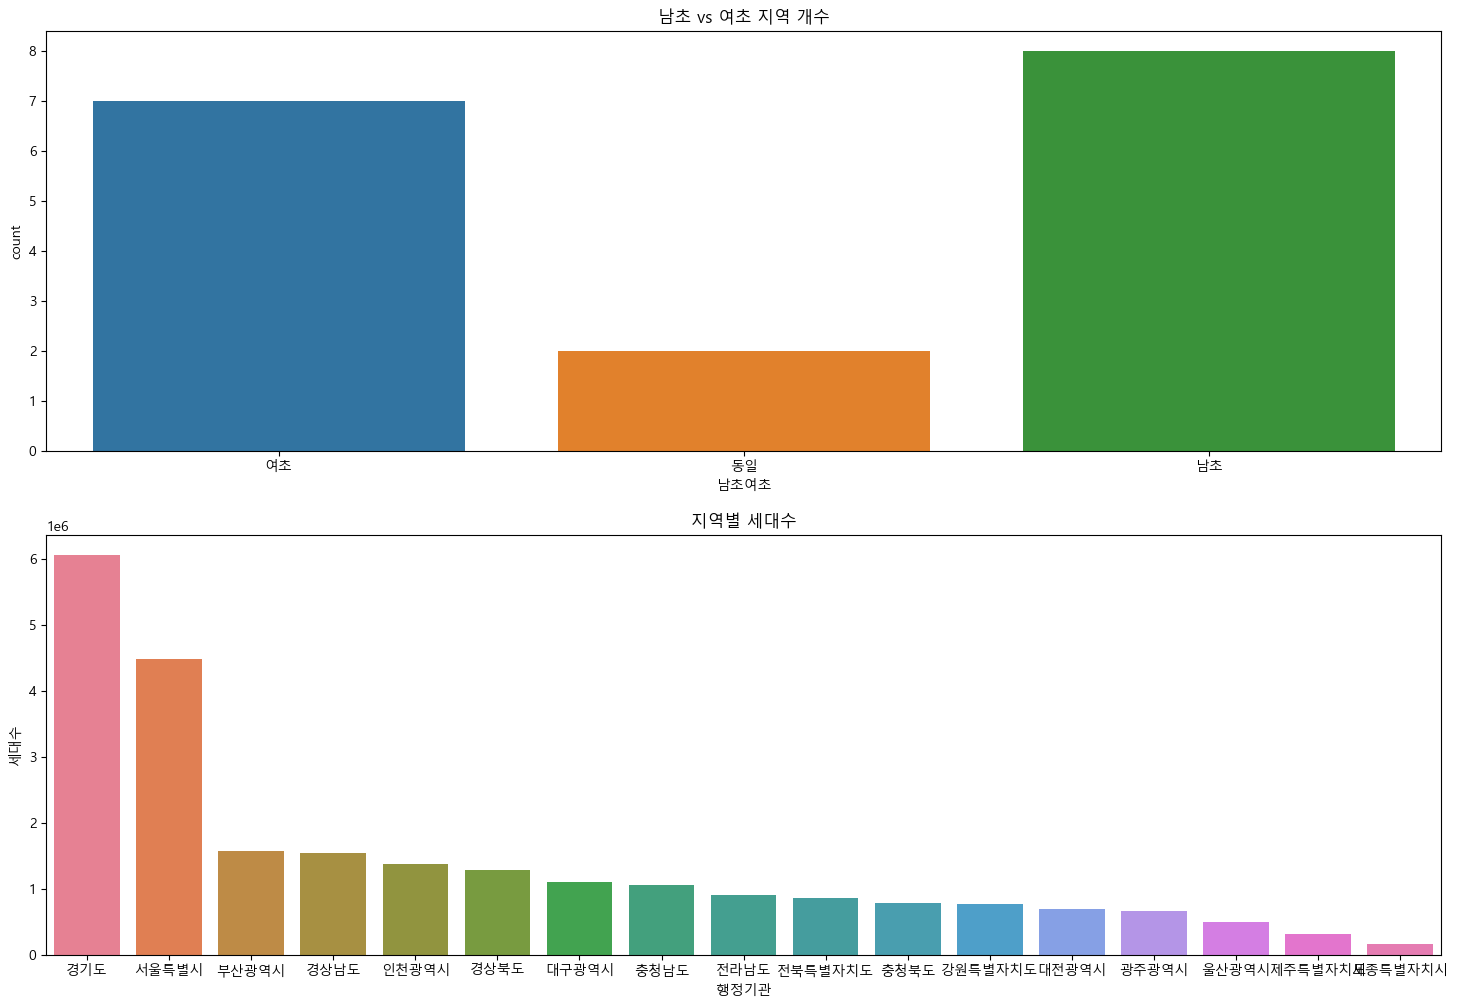

In [69]:
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

vs_plot = sns.countplot(x = '남초여초', data=temp_df, ax=axes1, hue='남초여초')
vs_plot.set_title('남초 vs 여초 지역 개수')
region_plot = sns.barplot(x='행정기관',y='세대수', data=df.sort_values(by='세대수',ascending=False), hue='행정기관')
region_plot.set_title('지역별 세대수')
plt.show()

6. 남자 인구 vs 여자 인구 비교 Plot

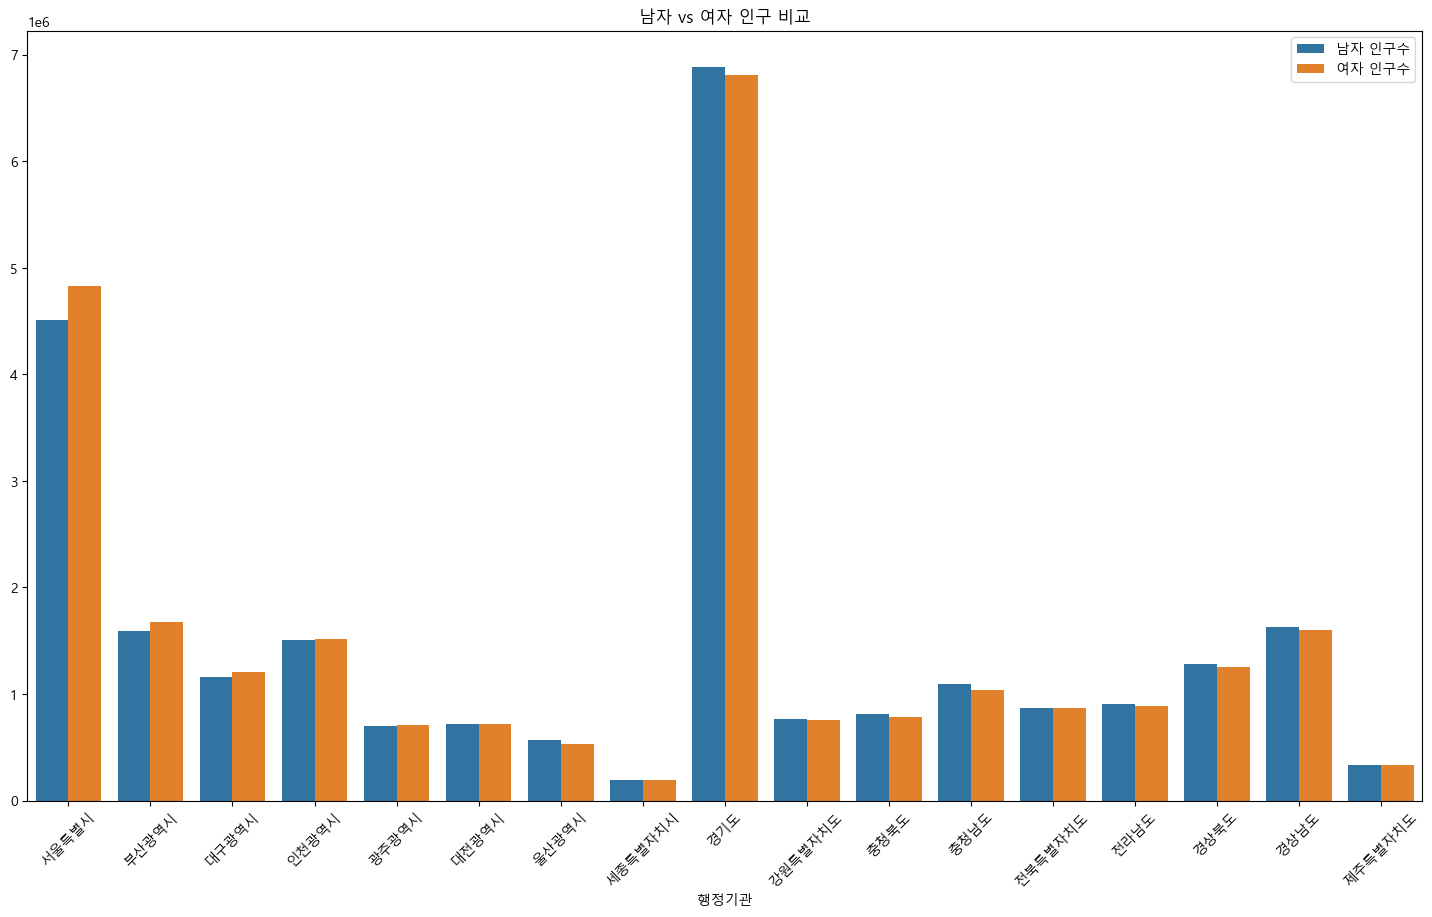

In [ ]:
plt.figure(figsize=(18,10))
vs_df = pd.melt(df, id_vars='행정기관', value_vars=['남자 인구수', '여자 인구수'], var_name='성별', value_name='인구수')
vs_barplot = sns.barplot(x='행정기관', y = '인구수',data=vs_df, hue='성별')

handles, labels = vs_barplot.get_legend_handles_labels()
vs_barplot.legend(handles, labels[0:])

plt.title('남자 vs 여자 인구 비교')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()
